<a href="https://colab.research.google.com/github/Jaisri15/Internship-Jaisri/blob/main/True_and_fake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

#Starting colabration

In [2]:
test=pd.read_csv('/content/drive/MyDrive/DataSets/True and Fake News Prediction/test.csv')

In [3]:
train=pd.read_csv('/content/drive/MyDrive/DataSets/True and Fake News Prediction/train.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Structure and Content

In [5]:
train.shape
# train.shape shows how many rows and columns are in the data

(20800, 5)

In [6]:
test.shape
# test.shape shows how many rows and columns are in the test data

(5200, 4)

In [7]:
train.info()
# train.info() gives details about the data, like column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [12]:
test.info()
#gives details about the data, like column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [11]:
train.isnull().sum()
#counts how many missing values are in each column

,0
id,0
title,558
author,1957
text,39
label,0


In [10]:
test.isnull().sum()
#counts how many missing values are in each column

,0
id,0
title,122
author,503
text,7


In [9]:
train.describe()
#gives basic statistics like mean, min, and max for numeric columns

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [8]:
test.describe()
#gives basic statistics like mean, min, and max for numeric columns

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [13]:
train.head()
#shows the first few rows of the data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
test.head()
#shows the first few rows of the data

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


#Text and data processing

Removing the null values

In [15]:
train=train.fillna(' ')
#replaces missing values with a blank space

In [16]:
train.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [17]:
test=test.fillna(' ')
#replaces missing values with a blank space

In [18]:
test.isnull().sum()

,0
id,0
title,0
author,0
text,0


In [20]:
train['subject']=train['author'] + ' ' + train['title']
#combines the 'author' and 'title' columns into a new 'subject' column.

In [21]:
train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [22]:
test['subject']=test['author'] + ' ' + test['title']
#combines the 'author' and 'title' columns into a new 'subject' column.

In [23]:
test.head()

,id,title,author,text,subject
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld Specter of Trump Loosens Tong...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams #NoDAPL: Native American Leaders...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor Tim Tebow Will Attempt Another C...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network Keiser Report: Meme Wa...


#Tokenization

In [24]:
import nltk
nltk.download('punkt')
# loads the NLTK library, and nltk.download('punkt') downloads the tokenizer data needed for text processing.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
from nltk.tokenize import word_tokenize
train['tokens']=train['subject'].apply(word_tokenize)
#imports a tool to split text into words. train['tokens'] = train['subject'].apply(word_tokenize) splits the text in the 'subject' column into words and saves it in a new 'tokens' column.

In [26]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


In [27]:
from nltk.tokenize import word_tokenize
test['tokens']=test['subject'].apply(word_tokenize)
#imports a tool to split text into words. train['tokens'] = train['subject'].apply(word_tokenize) splits the text in the 'subject' column into words and saves it in a new 'tokens' column.

In [28]:
test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld Specter of Trump Loosens Tong...,"[David, Streitfeld, Specter, of, Trump, Loosen..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ...,"[Russian, warships, ready, to, strike, terrori..."
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams #NoDAPL: Native American Leaders...,"[Common, Dreams, #, NoDAPL, :, Native, America..."
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor Tim Tebow Will Attempt Another C...,"[Daniel, Victor, Tim, Tebow, Will, Attempt, An..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network Keiser Report: Meme Wa...,"[Truth, Broadcast, Network, Keiser, Report, :,..."


#Lowercasing the text

In [29]:
train['tokens']=train['subject'].str.lower()
#converts all text in the 'subject' column to lowercase and saves it in the 'tokens' column.

In [30]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jailed for fictio...


In [31]:
test['tokens']=test['subject'].str.lower()
#converts all text in the 'subject' column to lowercase and saves it in the 'tokens' column.

In [32]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jailed for fictio...


#Removal of punctuation

In [33]:
train['subject']=train['subject'].str.replace('[^\w\s]',' ')
#removes all punctuation from the 'subject' column and replaces it with spaces.

In [34]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jailed for fictio...


In [35]:
test['subject']=test['subject'].str.replace('[^\w\s]',' ')
#removes all punctuation from the 'subject' column and replaces it with spaces.

In [36]:
test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld Specter of Trump Loosens Tong...,david streitfeld specter of trump loosens tong...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ...,russian warships ready to strike terrorists ...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams #NoDAPL: Native American Leaders...,common dreams #nodapl: native american leaders...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor Tim Tebow Will Attempt Another C...,daniel victor tim tebow will attempt another c...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network Keiser Report: Meme Wa...,truth broadcast network keiser report: meme wa...


#Removal of stop words

In [37]:
nltk.download('stopwords')
#downloads a list of common stopwords for text processing.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords
 #imports the list of common stopwords for text processing

In [39]:
sw=set(stopwords.words('english'))
print(sw)
#creates a set of English stopwords, and print(sw) displays the list of these stopwords.

{'about', 'wasn', 'shan', 'herself', 'what', 's', 'these', "that'll", "didn't", 'no', "weren't", 'me', 'll', "wouldn't", 'she', 'has', 'ma', 'yours', 'again', 'to', 'very', 'our', 'was', 'itself', 'theirs', 'through', 'under', 'him', 'below', 'at', 'doesn', 'when', "hasn't", 'just', 'more', 'yourselves', 'during', "don't", "needn't", 'with', 're', 'were', 'same', 'we', 'once', 'he', 'while', 'having', 'any', 'now', 'ain', 't', 'does', 'they', 'for', 'm', 'this', 'd', "shouldn't", 'mustn', "wasn't", 'themselves', 'won', 'her', 'didn', 'mightn', 'my', "won't", 'some', 'himself', 'am', 'out', "you're", 'both', 'here', 'shouldn', "should've", 'your', 'each', 'an', 'them', "aren't", 'hadn', 'as', 'all', 'be', 'further', 'only', 'then', 'such', 'of', 'the', 'have', 'do', 'there', "you've", 'needn', 'not', 'than', 'by', 'doing', 'their', "you'll", 'a', 'but', "isn't", 'it', 'most', 'hers', 'can', 'haven', 'so', 'is', 'being', 'did', 'ourselves', "mightn't", 'you', 'from', 'don', 'o', 'because

In [40]:
train['subject'] = train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set.

In [41]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why Truth Might Get You Fired,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed fictional ...,howard portnoy iranian woman jailed for fictio...


In [ ]:
test['subject'] = train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set.


In [42]:
test.head()

,id,title,author,text,subject,tokens
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David Streitfeld Specter of Trump Loosens Tong...,david streitfeld specter of trump loosens tong...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ...,russian warships ready to strike terrorists ...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams #NoDAPL: Native American Leaders...,common dreams #nodapl: native american leaders...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel Victor Tim Tebow Will Attempt Another C...,daniel victor tim tebow will attempt another c...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast Network Keiser Report: Meme Wa...,truth broadcast network keiser report: meme wa...


#Stemming or lammatization

In [43]:
from nltk.stem import PorterStemmer
#imports the Porter Stemmer for reducing words to their root forms.

In [44]:
stemmer=PorterStemmer()
#To Apply Stemming or Lemmatization :
train['subject'] = train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [45]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aide: we didn’t even see ...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynn flynn: hillari clinton, big wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com whi truth might get you fire,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilian kill in singl us a...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...,howard portnoy iranian woman jailed for fictio...


In [46]:
stemmer=PorterStemmer()
#To Apply Stemming or Lemmatization :
test['subject'] = train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [47]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aide: we didn’t even see ...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynn flynn: hillari clinton, big wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com whi truth might get you fire,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilian kill in singl us a...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...,howard portnoy iranian woman jailed for fictio...


#next day

#Vectorisation

In [48]:
x=train['subject']
y=train['label']
#`x = train['subject']` assigns the 'subject' column to `x`, and `y = train['label']` assigns the 'label' column to `y`.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
#import TfidfVectorizer` imports the TfidfVectorizer, which converts text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).

In [50]:
vt=TfidfVectorizer()

vt.fit(x)
#`vt = TfidfVectorizer()` creates a TF-IDF vectorizer object, and `vt.fit(x)` fits it to the text data in `x`.

TfidfVectorizer()

In [51]:
x.head()

,subject
0,darrel lucu hous dem aide: we didn’t even see ...
1,"daniel j. flynn flynn: hillari clinton, big wo..."
2,consortiumnews.com whi truth might get you fire
3,jessica purkiss 15 civilian kill in singl us a...
4,howard portnoy iranian woman jail fiction unpu...


In [52]:
x=vt.transform(x)
#transforms the text data in x into numerical features using the fitted TF-IDF vectorizer.

In [53]:
print(x)

  (0, 20082)	0.18569122923094866
  (0, 19451)	0.2804673354197719
  (0, 19111)	0.2538738023821247
  (0, 16482)	0.22004732789115347
  (0, 11079)	0.31027854590858667
  (0, 10754)	0.249287860827764
  (0, 9699)	0.21150710740076684
  (0, 9602)	0.15421430068784922
  (0, 8839)	0.19084641266521293
  (0, 6440)	0.1991033274381912
  (0, 5260)	0.2538738023821247
  (0, 4999)	0.23355319429348412
  (0, 4767)	0.3071190137274408
  (0, 3956)	0.21064761843798654
  (0, 3407)	0.31373942183885084
  (0, 811)	0.33890878358232296
  (1, 20432)	0.29951908908156866
  (1, 8615)	0.19815023888659125
  (1, 7107)	0.711483310803025
  (1, 4732)	0.26268668599849243
  (1, 3782)	0.19062686807106288
  (1, 3104)	0.3870784468942128
  (1, 2717)	0.15460118725006144
  (1, 2262)	0.2928176012009572
  (2, 20659)	0.2907853396543726
  :	:
  (20797, 11775)	0.2909764068763164
  (20797, 11187)	0.35616902888355706
  (20797, 10438)	0.21986788391240106
  (20797, 9561)	0.13983991167770832
  (20797, 8881)	0.2147112695760861
  (20797, 4818)	0.

In [54]:
# For building the machine learning models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [55]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, stratify=y, random_state=42)

In [57]:
model = LogisticRegression()

In [58]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [59]:
ytrpredict=model.predict(xtrain)

In [60]:
# Assuming 'ytrain' from your previous cell is the correct variable:
accuracy = accuracy_score(ytrain, ytrpredict)
precision = precision_score(ytrain, ytrpredict)
recall = recall_score(ytrain, ytrpredict)
f1 = f1_score(ytrain, ytrpredict)  # Assuming '_train' was meant to be 'ytrain'

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)

 Training Accuracy: 0.9873798076923077
 Training Precision: 0.9797920113448357
 Training Recall: 0.9953181272509004
Training F1 Score: 0.9874940447832301


In [61]:
ytrpredict=model.predict(xtest)

In [62]:
# Assuming 'ytest' from your previous cell is the correct variable:
accuracy = accuracy_score(ytest, ytrpredict)
precision = precision_score(ytest, ytrpredict)
recall = recall_score(ytest, ytrpredict)
f1 = f1_score(ytest, ytrpredict)

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:', f1)

 Training Accuracy: 0.9745192307692307
 Training Precision: 0.956581986143187
 Training Recall: 0.9942390782525204
Training F1 Score: 0.9750470809792845


In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report


In [64]:
x_Train,x_Test,y_Train,y_Test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
#test_size is shown only 20% if data is shown size


#ModelBuilding

In [65]:
Model=LogisticRegression()
#Logistic Regression is call as Model

In [66]:
Model.fit(x_Train,y_Train)# Fit the model of traing dataset

LogisticRegression()

In [67]:
LogisticRegression()

LogisticRegression()

In [68]:
y_pred=Model.predict(x_Train)
# the training input is placed in the var y_pred

In [69]:
accuracy = accuracy_score(y_Train,y_pred) #we use y_train because we get accuracy score for output train dataset
precision= precision_score(y_Train,y_pred)
recall = recall_score(y_Train,y_pred)
f1 = f1_score(y_Train, y_pred)
#we use y_train because we get accuracy score for output train dataset
print(' Training Accuracy:', accuracy)
#it tells how our accuracy happen
print(' Training Precision:', precision)
#it tells how true statement is precise in the project in the output 95% is pricise the true value correctly
print(' Training Recall:', recall)
# it tells collect  only the positive predictions
print('Training F1 Score:', f1)

 Training Accuracy: 0.9864783653846154
 Training Precision: 0.9782839608167119
 Training Recall: 0.995078031212485
Training F1 Score: 0.9866095340117836


In [70]:
Y_pred=Model.predict(x_Test)


In [71]:
accuracy = accuracy_score(y_Test,Y_pred)
precision= precision_score(y_Test,Y_pred)
recall = recall_score(y_Test,Y_pred)
f1 = f1_score(y_Test, Y_pred)
#we use y_train because we get accuracy score for output test dataset

print(' Training Accuracy:', accuracy)
#it tells how our accuracy happen for test dataset
print(' Training Precision:', precision)
#it tells how true statement is precise in the project in the output 95% is pricise the true value correctlyfor test dataset
print(' Training Recall:', recall)
# it tells collect  only the positive predictions in test dataset
print('Training F1 Score:', f1)

 Training Accuracy: 0.9762019230769231
 Training Precision: 0.9622553588070829
 Training Recall: 0.9913586173787806
Training F1 Score: 0.9765902104516434


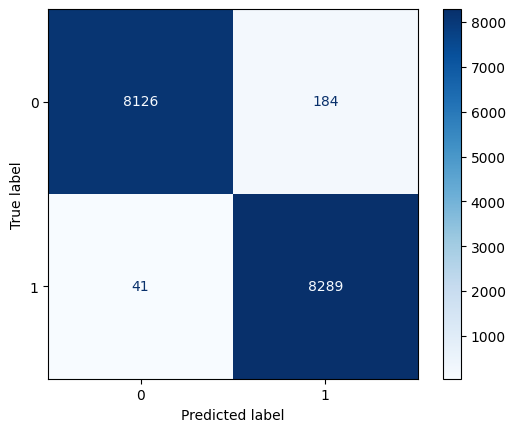

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 # Generate the confusion matrix
cm = confusion_matrix(y_Train,y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

#confu matrix gives true positive, true negative, false positive, false negative
#7877 - fake news predict correctly
# 8280- it s true and predict true correctly
# 42- true news nu wrong ah predict
# 433 - fake news

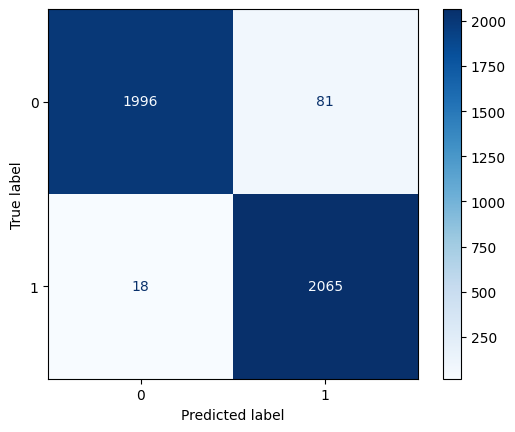

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 # Generate the confusion matrix
cm = confusion_matrix(y_Test,Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [76]:
import pickle
# to saving all project

In [77]:
lr=LogisticRegression

In [78]:
prediction="newsprediction.sav"
pickle.dump(lr,open(prediction,'wb'))

#Summary

This project uses Natural Language Processing (NLP) to figure out if news is real or fake. It looks at things like word patterns and sentiment to judge if news is trustworthy. The data is organized with text, labels (real or fake), and numerical information for better analysis. Preparing the data is a crucial part and involves several steps. First, we remove any missing or incomplete data. Next, we break the text into individual words or phrases, make everything lowercase, and get rid of unnecessary punctuation. We also remove common words that don’t add much meaning and reduce words to their basic forms. Finally, we turn the text into numbers that the model can use. These steps help ensure accurate classification of news as real or fake.